In [21]:
import sqlite3
import nltk
import utils
from wordcloud import WordCloud, STOPWORDS 
from collections import Counter
import matplotlib.pyplot as plt 
conn=sqlite3.connect('songs.db')
cur=conn.cursor()

In [22]:
res=cur.execute("select count(*),Economic from song group by Economic").fetchall()
res
#0 for depression, 1 for prosperity

[(3736, 0), (2922, 1)]

In [23]:
#boom songs
songs=[]
boom_artist=[]
example_text=cur.execute("select lyrics,Artist from song where Economic is 1 and lyrics is not null").fetchall()
for i in example_text:
    songs.append(utils.tokenize_word(utils.clean_text(i[0])))
    boom_artist.append(i[1])
boom_tokens=[]
for i in songs:
    for k in i:
        boom_tokens.append(k)

In [24]:
#bust songs
songs=[]
bust_artist=[]
example_text=cur.execute("select lyrics,Artist from song where Economic is 0 and lyrics is not null").fetchall()
for i in example_text:
    songs.append(utils.tokenize_word(utils.clean_text(i[0])))
    bust_artist.append(i[1])
bust_tokens=[]
for i in songs:
    for k in i:
        bust_tokens.append(k)

In [25]:
unique_to_boom_lyrics=Counter(boom_tokens)-Counter(bust_tokens)
unique_to_bust_lyrics=Counter(bust_tokens)-Counter(boom_tokens)

In [26]:
unique_to_boom_artists=Counter(boom_artist)-Counter(bust_artist)
unique_to_bust_artists=Counter(bust_artist)-Counter(boom_artist)

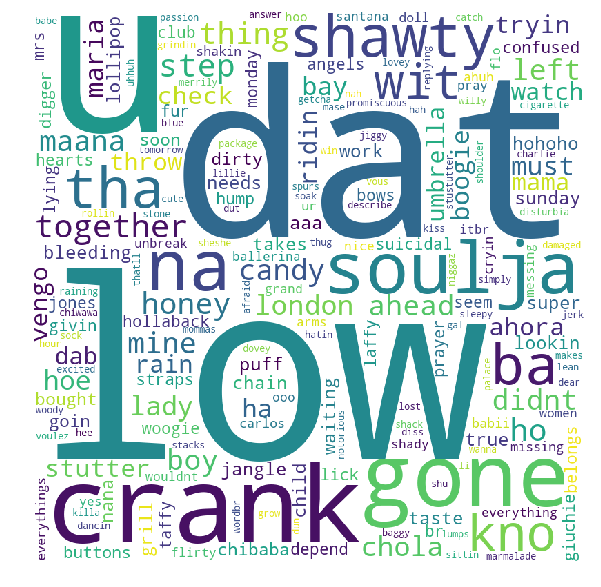

In [27]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(unique_to_boom_lyrics) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

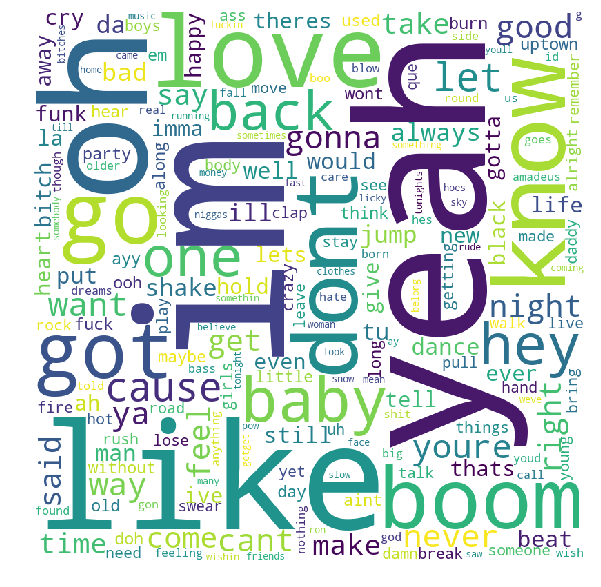

In [28]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(unique_to_bust_lyrics) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

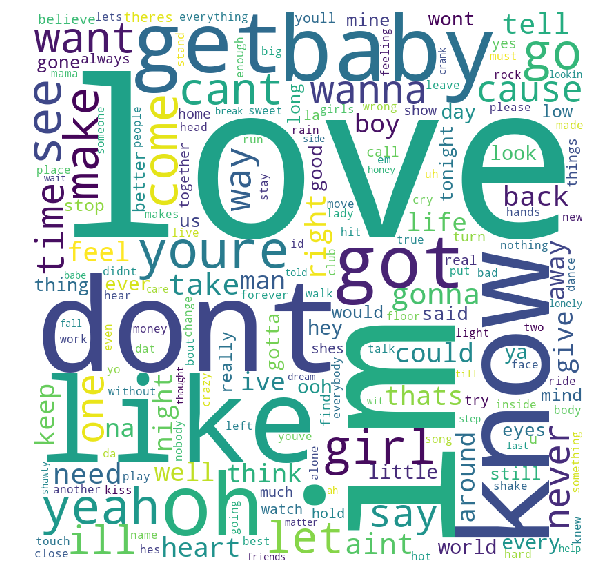

In [31]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(Counter(boom_tokens)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

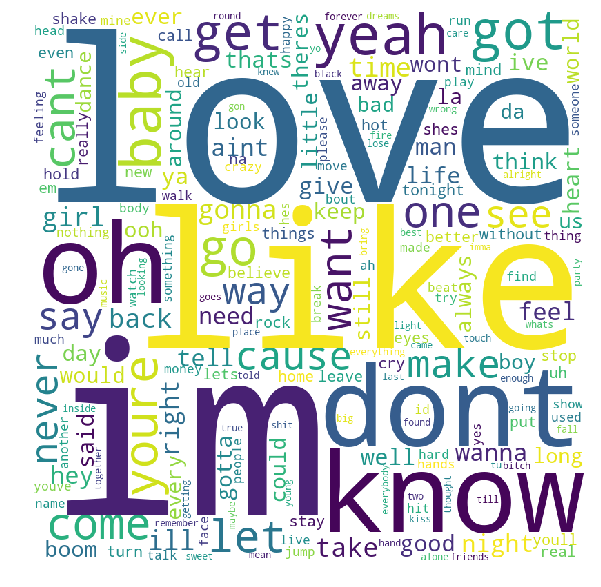

In [32]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(Counter(bust_tokens)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

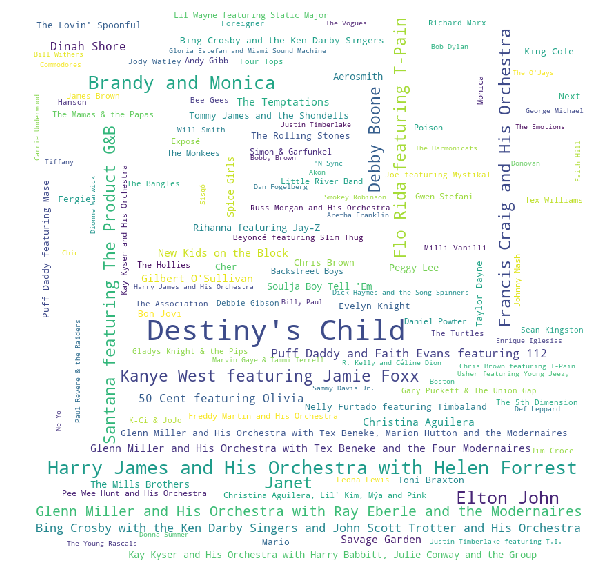

In [29]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(unique_to_boom_artists) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

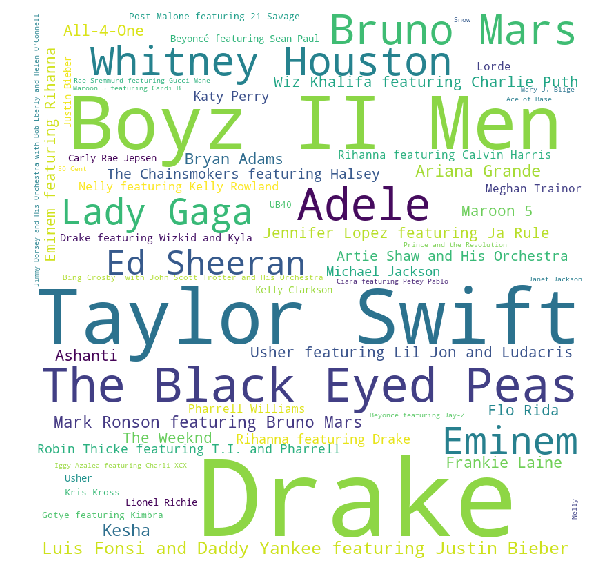

In [30]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(unique_to_bust_artists) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 